In [1]:
import pandas as pd
import numpy as np
import os
import shutil

In [2]:
train_dir="./train/train/"
test_dir="./test1/test1/"
filenames = os.listdir(train_dir)

In [4]:
len(filenames)

25000

In [3]:
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
import time
start_time = time.time()
train_image=[]
labels=[]
for img in range(len(filenames)):
    
    image=os.path.join(train_dir+filenames[img])
    image=load_img(image,target_size=(100,100))
    image=img_to_array(image)/255
    train_image.append(image)
    labels.append(categories[img])
    if(img%1000==0):
        print("writing ",img)
end = time.time()
print(end-start_time)

writing  0
writing  1000
writing  2000
writing  3000
writing  4000
writing  5000
writing  6000
writing  7000
writing  8000
writing  9000
writing  10000
writing  11000
writing  12000
writing  13000
writing  14000
writing  15000
writing  16000
writing  17000
writing  18000
writing  19000
writing  20000
writing  21000
writing  22000
writing  23000
writing  24000
165.86888527870178


In [6]:
import time
start_time = time.time()
test_image=[]
filenames2 = os.listdir(test_dir)
for img in range(len(filenames2)):
    
    image=os.path.join(test_dir+filenames2[img])
    image=load_img(image,target_size=(100,100))
    image=img_to_array(image)/255
    test_image.append(image)
    if(img%1000==0):
        print("writing ",img)
end = time.time()
print(end-start_time)

writing  0
writing  1000
writing  2000
writing  3000
writing  4000
writing  5000
writing  6000
writing  7000
writing  8000
writing  9000
writing  10000
writing  11000
writing  12000
292.60364508628845


In [9]:
!mkdir saved

In [10]:
import time
start_time = time.time()
import pickle
with open("saved/train_image.pkl","wb") as f:
    pickle.dump(train_image,f)
end = time.time()
print(end-start_time)

302.4456944465637


In [12]:
import time
start_time = time.time()
with open("saved/test_image.pkl","wb") as f:
    pickle.dump(test_image,f)
end = time.time()
print(end-start_time)

103.37113404273987


In [7]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
def drawimage(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()

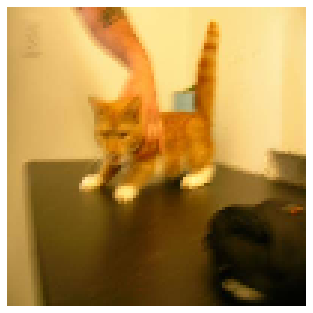

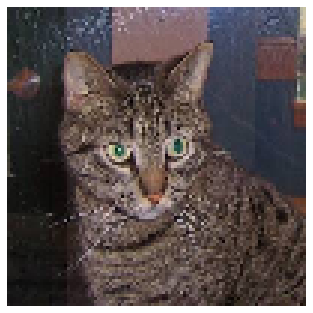

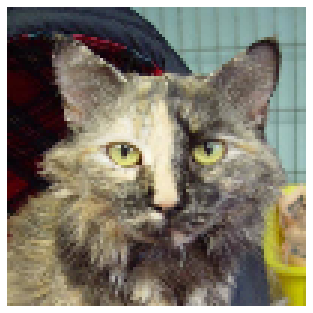

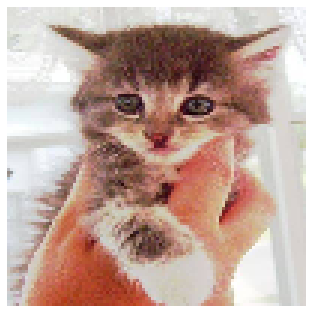

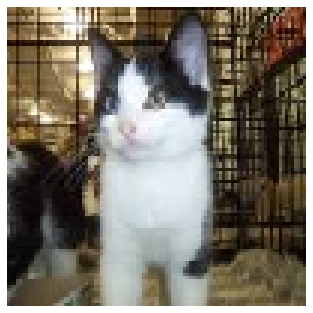

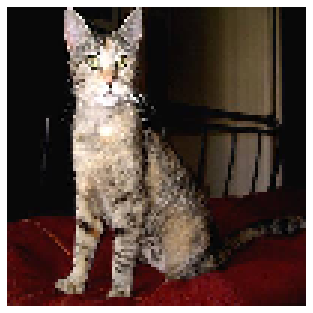

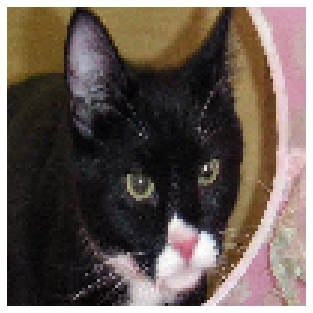

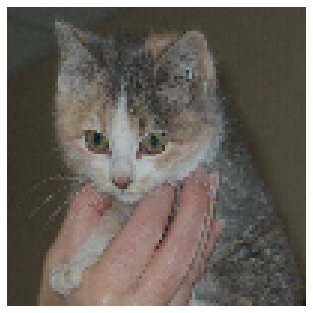

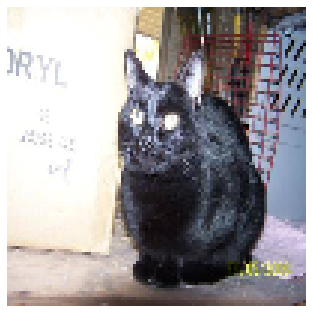

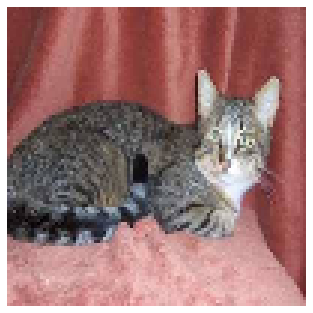

In [8]:
for i in range(10):
    drawimage(train_image[i])

In [9]:
import random
combined=list(zip(train_image,categories))
random.shuffle(combined)
train_image[:],categories[:]=zip(*combined)

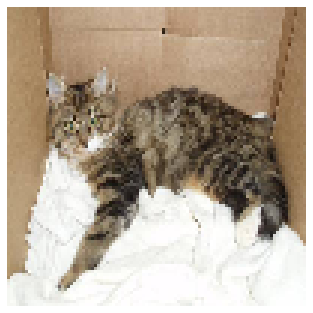

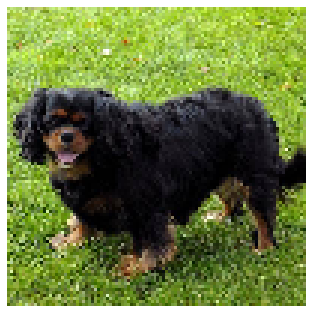

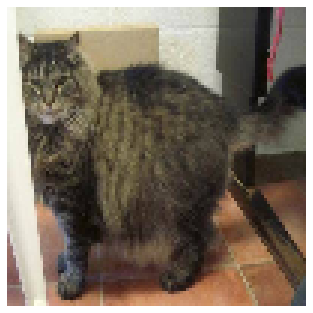

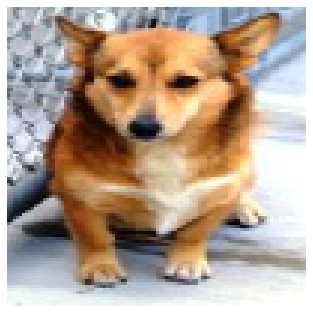

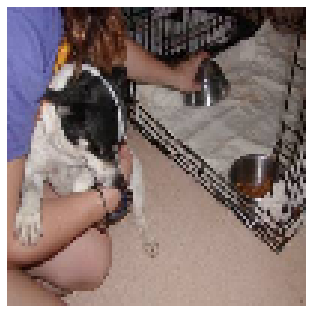

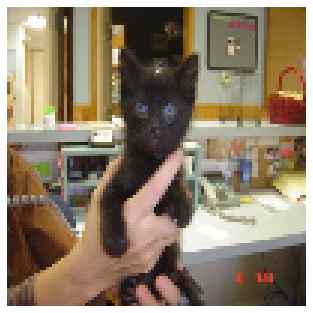

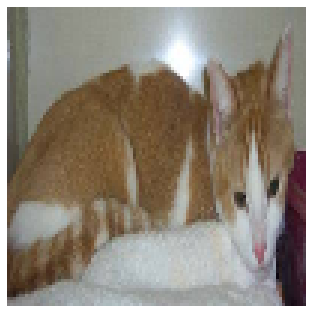

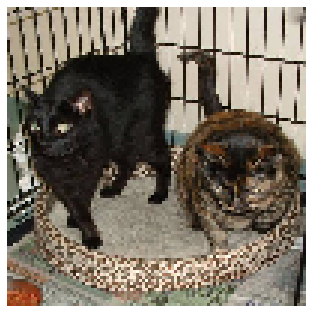

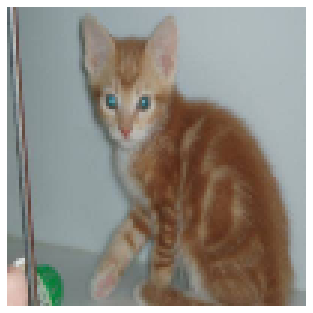

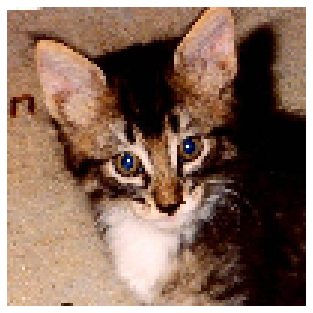

In [10]:
for i in range(10):
    drawimage(train_image[i])

In [11]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,GlobalAveragePooling2D,Flatten
from keras.callbacks import ModelCheckpoint,EarlyStopping
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2) ))


model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2) ))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2) ))


model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2) ))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)        

In [14]:
import time
start_time = time.time()
X=np.array(train_image)
y=np.array(categories)
Test_data=np.array(test_image)
end = time.time()
print(end-start_time)

774.5735909938812


In [15]:
type(X)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [22]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [24]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
filepath="./saved/checkpoint.hdf5"
checkpoint =ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks1 = [earlystop, learning_rate_reduction,checkpoint]

In [ ]:
history=model.fit(X_train,y_train,
          validation_
         callbacks=callbacks)

In [ ]:
np.array(X_train).shape